In [1]:
import os
import string

import regex as re
import scyjava
from IPython.display import SVG, display


In [2]:
# if your cdk .jar is in the cdk folder
abs_path_to_cdk_jar_folder = os.path.abspath(os.path.join(os.getcwd(), 'cdk'))
# if cdk jar is in another folder, please specify the absolute path
# cdk_jar_path = os.path.abspath('path_to_your_cdk_folder')
print(abs_path_to_cdk_jar_folder)

/Users/ni/PycharmProjects/cdk-cxsmiles/nb/cdk


In [3]:
# set java env
scyjava.config.add_classpath(*scyjava.config.find_jars(abs_path_to_cdk_jar_folder))
scyjava.config.endpoints.append('org.openscience.cdk:cdk-bundle:2.10')  # check your cdk-bundle version
print(scyjava.config.endpoints)

['org.openscience.cdk:cdk-bundle:2.10']


In [4]:
# import basic libs
SmilesParser = scyjava.jimport('org.openscience.cdk.smiles.SmilesParser')
Builder = scyjava.jimport('org.openscience.cdk.silent.SilentChemObjectBuilder')
DepictionGenerator = scyjava.jimport('org.openscience.cdk.depict.DepictionGenerator')
IPseudoAtom = scyjava.jimport('org.openscience.cdk.interfaces.IPseudoAtom')

In [5]:
smi = 'CCCCCCCCCCCCCCCCCC(O)=O'  # FA 18:0

In [6]:
sp = SmilesParser(Builder.getInstance())
mol = sp.parseSmiles(smi)
generator = DepictionGenerator()
svg_content = generator.depict(mol).toSvgStr()
svg_str = scyjava.to_python(svg_content)  # convert the 'java.lang.String' to python string

In [7]:
display(SVG(svg_str))

In [8]:
cxsmi = 'CC(O)=O |Sg:n:0:x:ht |x=17'  # FA 18:0

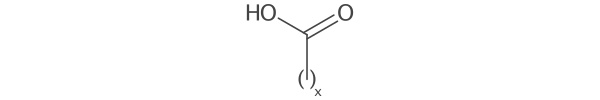

In [9]:
sp = SmilesParser(Builder.getInstance())
mol = sp.parseSmiles(cxsmi)
generator = DepictionGenerator().withSize(600, 100).withZoom(2)
svg_content = generator.depict(mol).toSvgStr("px")
svg_str = scyjava.to_python(svg_content)
display(SVG(svg_str))

In [10]:
def cxsmi_to_svg(usr_cxsmi: str, width: int = 600, height: int = 100, zoom_to_fit: bool = True,
                 with_atom_numbers: bool = False):
    cx_sp = SmilesParser(Builder.getInstance())
    cx_mol = cx_sp.parseSmiles(usr_cxsmi)
    if zoom_to_fit:
        cx_generator = DepictionGenerator().withSize(width, height).withFillToFit()
    else:
        cx_generator = DepictionGenerator().withSize(width, height)
    if not with_atom_numbers:
        cx_svg_content = cx_generator.depict(cx_mol).toSvgStr("px")
    else:
        cx_svg_content = cx_generator.withAtomNumbers().depict(cx_mol).toSvgStr("px")
    cx_svg_str = scyjava.to_python(cx_svg_content)
    # split using " |" and get the last segment for the remarks
    cx_remark = usr_cxsmi.split(' |')[-1]
    # remove the terminal space and "|"
    cx_remark.rstrip(" |")
    print(f"User CXSMILES: {usr_cxsmi}")
    print(f"Remarks: {cx_remark}")
    display(SVG(cx_svg_str))

User CXSMILES: CC(O)=O |Sg:n:0:x:ht |x=17
Remarks: x=17


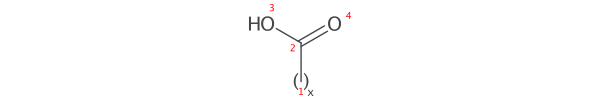

In [11]:
cxsmi_to_svg(cxsmi, with_atom_numbers=True)

User CXSMILES: CC=CCC(O)=O |Sg:n:0:x:ht,Sg:n:3:y:ht |x+y=15
Remarks: x+y=15


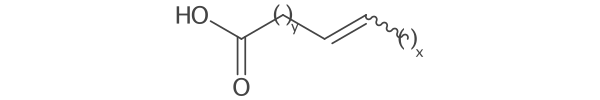

In [12]:
fa18_1_cxsmi = 'CC=CCC(O)=O |Sg:n:0:x:ht,Sg:n:3:y:ht |x+y=15'  # FA 18:1
cxsmi_to_svg(fa18_1_cxsmi)

User CXSMILES: CC=CCC=CCC(O)=O |Sg:n:0:x:ht,Sg:n:3:y:ht,Sg:n:6:z:ht |x+y+z=13
Remarks: x+y+z=13


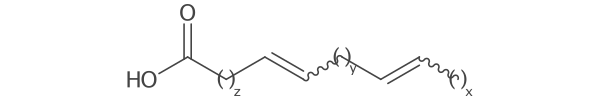

In [13]:
fa18_2_cxsmi = 'CC=CCC=CCC(O)=O |Sg:n:0:x:ht,Sg:n:3:y:ht,Sg:n:6:z:ht |x+y+z=13'  # FA 18:2
cxsmi_to_svg(fa18_2_cxsmi)

User CXSMILES: CC=CCC=CCC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht,Sg:n:6:c:ht,Sg:n:9:d:ht |a+b+c+d=11
Remarks: a+b+c+d=11


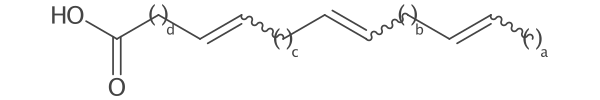

In [14]:
fa18_3_cxsmi = 'CC=CCC=CCC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht,Sg:n:6:c:ht,Sg:n:9:d:ht |a+b+c+d=11'  # FA 18:3
cxsmi_to_svg(fa18_3_cxsmi)

User CXSMILES: CC=CCC=CCC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht,Sg:n:6:c:ht,Sg:n:9:d:ht |a+b+c+d=13
Remarks: a+b+c+d=13


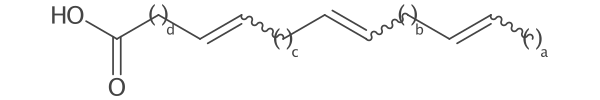

In [15]:
fa20_3_cxsmi = 'CC=CCC=CCC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht,Sg:n:6:c:ht,Sg:n:9:d:ht |a+b+c+d=13'  # FA 20:3
cxsmi_to_svg(fa20_3_cxsmi)

User CXSMILES: CC=CCC=CCC=CCC=CCC=CCC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht,Sg:n:6:c:ht,Sg:n:9:d:ht,Sg:n:12:e:ht,Sg:n:15:f:ht ,Sg:n:18:g:ht |a+b+c+d+e+f+g=9
Remarks: a+b+c+d+e+f+g=9


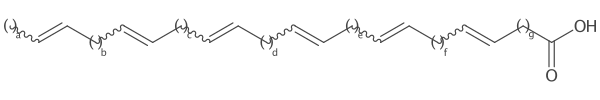

In [16]:
fa22_6_cxsmi = ("CC=CCC=CCC=CCC=CCC=CCC=CCC(O)=O |"
                "Sg:n:0:a:ht,Sg:n:3:b:ht,Sg:n:6:c:ht,Sg:n:9:d:ht,Sg:n:12:e:ht,Sg:n:15:f:ht ,Sg:n:18:g:ht |"
                "a+b+c+d+e+f+g=9")
# FA 22:6
cxsmi_to_svg(fa22_6_cxsmi)

There are few ways to generate the same FA 18:1

`CC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht |a+b=15`

`OC(CC=CC)=O |Sg:n:2:a:ht,Sg:n:5:b:ht |a+b=15|`

`OC(=O)CC=CC |Sg:n:3:a:ht,Sg:n:6:b:ht |a+b=15|`

Considering the future LLM-based string options, `OC(=O)CC=CC` might be a better option.

Normal FA18:1


`OC(=O)CC=CC |Sg:n:3:a:ht,Sg:n:6:b:ht |a+b=15|`

O-18:1

`OCC=CC |Sg:n:1:a:ht,Sg:n:4:b:ht |a+b=16|`

P-18:1

`OCC=CCC=CC |Sg:n:4:a:ht,Sg:n:7:b:ht |a+b=14|`

P-18:0

`OCC=CC |Sg:n:4:a:ht|a=15|`

In this way the FA, O- and P- can easily be distinguished. And the O-18:1 / P-18:0 isomer pair looks similar, can be clustered together while remain distinguished.


User CXSMILES: CC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht |a+b=15
Remarks: a+b=15


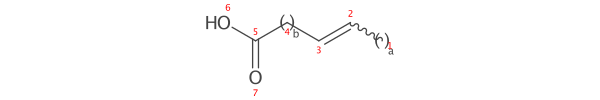

In [17]:
fa18_1_cxsmi_v1 = 'CC=CCC(O)=O |Sg:n:0:a:ht,Sg:n:3:b:ht |a+b=15'  # FA 18:1
cxsmi_to_svg(fa18_1_cxsmi_v1, with_atom_numbers=True)

User CXSMILES: OC(CC=CC)=O |Sg:n:2:a:ht,Sg:n:5:b:ht |a+b=15|
Remarks: a+b=15|


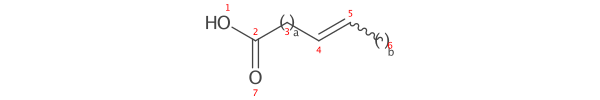

In [18]:
fa18_1_cxsmi_v2 = "OC(CC=CC)=O |Sg:n:2:a:ht,Sg:n:5:b:ht |a+b=15|"  # FA 18:1
cxsmi_to_svg(fa18_1_cxsmi_v2, with_atom_numbers=True)

User CXSMILES: OC(=O)CC=CC |Sg:n:3:a:ht,Sg:n:6:b:ht |a+b=15|
Remarks: a+b=15|


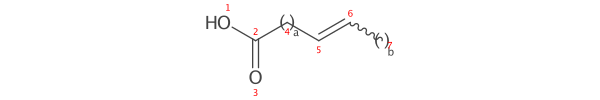

In [19]:
fa18_1_cxsmi_v3 = "OC(=O)CC=CC |Sg:n:3:a:ht,Sg:n:6:b:ht |a+b=15|"  # FA 18:1
cxsmi_to_svg(fa18_1_cxsmi_v3, with_atom_numbers=True)

In [20]:
def gen_fa_cxsmiles(c_count: int = 2, db_count: int = 0, start_from_char: str = "a", as_ap: bool = False,
                    link_type: str = 'a'):
    sg_lb_idx_shift = 0
    if link_type.lower().startswith("o"):
        if as_ap:
            left_cap_smi = r"*CC"
            sg_lb_idx_shift = 2
        else:
            left_cap_smi = r"OCC"
            sg_lb_idx_shift = 2
    elif link_type.lower().startswith("p"):
        if as_ap:
            left_cap_smi = r"*C\C=C\C"
            sg_lb_idx_shift = 4
        else:
            left_cap_smi = r"OC\C=C\C"
            sg_lb_idx_shift = 4
    else:
        if as_ap:
            left_cap_smi = r"*C(=O)C"
            sg_lb_idx_shift = 3
        else:
            left_cap_smi = "OC(=O)C"
            sg_lb_idx_shift = 3

    seg_db_smi = "C=CC"

    smi_segments = [left_cap_smi]
    if db_count > 0:
        smi_db_segments = db_count * [seg_db_smi]
        smi_segments.extend(smi_db_segments)
    elif db_count == 0:
        pass
    else:
        raise ValueError("db_count must be greater than 0 for number of C=C")
    # core smiles part
    core_smi = ''.join(smi_segments)
    # generate the Sg annotations
    sg_seg_template = "Sg:n:INDEX:LABEL:ht,"
    # generate atom index: label dict, use
    label_count = db_count + 1
    sg_segments = []
    all_letters = string.ascii_lowercase + string.ascii_uppercase
    start_char_idx = all_letters.index(start_from_char)
    if 0 <= db_count <= 26 and start_char_idx + db_count <= 52:
        sg_label_indices = list(
            range(0 + sg_lb_idx_shift, 3 * (db_count + 1) + 1 + sg_lb_idx_shift, 3))  # each db_seg has 3 atoms
        sg_label_str_indices = [str(i) for i in sg_label_indices]
        sg_labels = list(all_letters[start_char_idx:start_char_idx + db_count + 1])
        sg_idx_lb_info = dict(zip(sg_label_str_indices, sg_labels))
    else:
        raise ValueError("No more than 26 C=C allowed, select correct number of C=C and label letters.")
    for idx, (atom_idx, lb) in enumerate(sg_idx_lb_info.items()):
        tmp_sg_seg = re.sub(r'\b(INDEX|LABEL)\b', lambda m: {"INDEX": atom_idx, "LABEL": lb}[m.group()],
                            sg_seg_template)
        sg_segments.append(tmp_sg_seg)
    sg_smi = "".join(sg_segments)

    # add the _APs
    if as_ap:
        cx_sp = SmilesParser(Builder.getInstance())
        cx_mol = cx_sp.parseSmiles(core_smi)
        cx_atom_count = cx_mol.getAtomCount()
        semicol_str_lst = [";"] * cx_atom_count
        semicol_str_lst[0] = "_AP1"
        semicol_str = "".join(semicol_str_lst)
        ap_str = f"${semicol_str}$"
        sg_smi = f"{ap_str}{sg_smi}"
    else:
        pass

    sg_smi = sg_smi.rstrip(",")

    # generate remarks
    remark_seg = '+'.join(sg_labels)
    backbone_c_count = core_smi.count("C")
    sg_atom_count = c_count - backbone_c_count + len(sg_labels)
    remark_smi = f"{remark_seg}={sg_atom_count}"

    fa_cxsmi = f"{core_smi} |{sg_smi} |{remark_smi}|"
    return fa_cxsmi


User CXSMILES: OC(=O)C |Sg:n:3:a:ht |a=17|
Remarks: a=17|


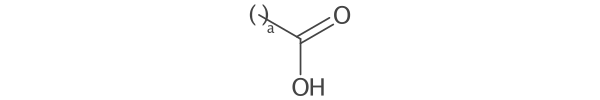

In [21]:
test_fa_cxsmi = gen_fa_cxsmiles(c_count=18, db_count=0)
cxsmi_to_svg(test_fa_cxsmi)

User CXSMILES: OC(=O)CC=CC |Sg:n:3:a:ht,Sg:n:6:b:ht |a+b=15|
Remarks: a+b=15|


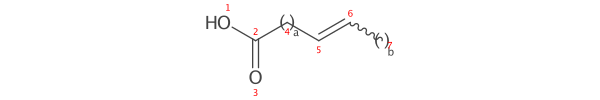

In [22]:
test_fa_cxsmi_fa = gen_fa_cxsmiles(c_count=18, db_count=1)
cxsmi_to_svg(test_fa_cxsmi_fa, with_atom_numbers=True)

User CXSMILES: *C(=O)CC=CC |$_AP1;;;;;;$Sg:n:3:m:ht,Sg:n:6:n:ht |m+n=15|
Remarks: m+n=15|


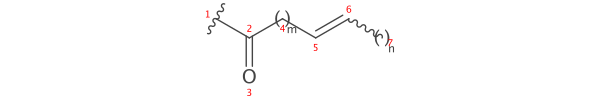

In [23]:
test_fa_cxsmi_res = gen_fa_cxsmiles(c_count=18, db_count=1, start_from_char="m", as_ap=True)
cxsmi_to_svg(test_fa_cxsmi_res, with_atom_numbers=True)

User CXSMILES: OCCC=CC |Sg:n:2:a:ht,Sg:n:5:b:ht |a+b=15|
Remarks: a+b=15|


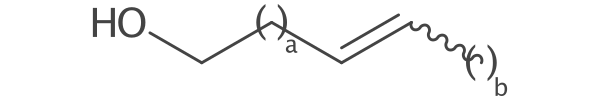

In [24]:
test_fa_cxsmi = gen_fa_cxsmiles(c_count=18, db_count=1, link_type="o")
cxsmi_to_svg(test_fa_cxsmi)

User CXSMILES: *CCC=CC |$_AP1;;;;;$Sg:n:2:a:ht,Sg:n:5:b:ht |a+b=15|
Remarks: a+b=15|


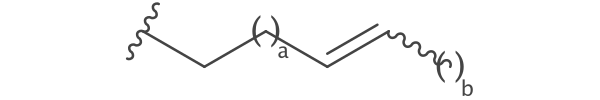

In [25]:
test_fa_cxsmi = gen_fa_cxsmiles(c_count=18, db_count=1, link_type="o", as_ap=True)
cxsmi_to_svg(test_fa_cxsmi)

User CXSMILES: OC\C=C\CC=CC |Sg:n:4:a:ht,Sg:n:7:b:ht |a+b=13|
Remarks: a+b=13|


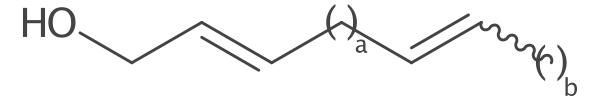

In [26]:
test_fa_cxsmi = gen_fa_cxsmiles(c_count=18, db_count=1, link_type="p")
cxsmi_to_svg(test_fa_cxsmi)

User CXSMILES: *C\C=C\CC=CC |$_AP1;;;;;;;$Sg:n:4:a:ht,Sg:n:7:b:ht |a+b=13|
Remarks: a+b=13|


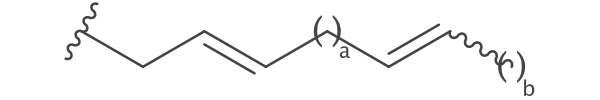

In [27]:
test_fa_cxsmi = gen_fa_cxsmiles(c_count=18, db_count=1, link_type="p", as_ap=True)
cxsmi_to_svg(test_fa_cxsmi)

User CXSMILES: OC(=O)CC=CCC=CCC=CC |Sg:n:3:a:ht,Sg:n:6:b:ht,Sg:n:9:c:ht,Sg:n:12:d:ht |a+b+c+d=13|
Remarks: a+b+c+d=13|


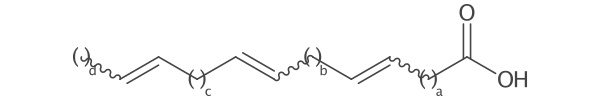

In [28]:
test_fa_cxsmi = gen_fa_cxsmiles(c_count=20, db_count=3)
cxsmi_to_svg(test_fa_cxsmi)

User CXSMILES: [C@](COP(=O)([O-])OCC[N+](C)(C)C)([H])(O[R])CO[R].[*]C(CC=CC)=O.[*]C(CC=CCC=CCC=CC)=O |Sg:n:21:a:ht,Sg:n:24:b:ht,Sg:n:28:c:ht,Sg:n:31:d:ht,Sg:n:34:e:ht,Sg:n:37:f:ht,$;;;;;;;;;;;;;;;;;;;_AP1;;;;;;;_AP1;;;;;;;;;;;$|a+b+c+d=11,e+f=15
Remarks: Sg:n:21:a:ht,Sg:n:24:b:ht,Sg:n:28:c:ht,Sg:n:31:d:ht,Sg:n:34:e:ht,Sg:n:37:f:ht,$;;;;;;;;;;;;;;;;;;;_AP1;;;;;;;_AP1;;;;;;;;;;;$|a+b+c+d=11,e+f=15


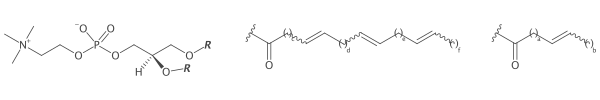

In [29]:
pc_18_1n18_3_cxsmi = ("[C@](COP(=O)([O-])OCC[N+](C)(C)C)([H])(O[R])CO[R]"
                      ".[*]C(CC=CC)=O"
                      ".[*]C(CC=CCC=CCC=CC)=O |"
                      "Sg:n:21:a:ht,Sg:n:24:b:ht,Sg:n:28:c:ht,Sg:n:31:d:ht,Sg:n:34:e:ht,Sg:n:37:f:ht,"
                      "$;;;;;;;;;;;;;;;;;;;_AP1;;;;;;;_AP1;;;;;;;;;;;$|"
                      "a+b+c+d=11,e+f=15")
cxsmi_to_svg(pc_18_1n18_3_cxsmi)

In [30]:
# get the attachment point atom index
def shift_sg_indices(input_str:str, shift_val:int, remove_ap: bool=True):
    if remove_ap:
        # Remove the ; _AP part from the segment
        input_str = re.sub(r"\$.*?\$", "", input_str)
    else:
        pass
    pattern = r"(?P<prefix>Sg:n:)(?P<idx>\d{1,3})(?P<suffix>:\w{1,2}:ht)"
    matches = re.findall(pattern, input_str)
    updated_segments = []
    for prefix, idx, suffix in matches:
        updated_segments.append(f"{prefix}{int(idx) + shift_val}{suffix}")
    modified_str = ','.join(updated_segments)
    return modified_str

def gen_pc_cxsmiles(
        lipid_class: str = "PC",
        fa1_link: str = 'a', fa1_c: int = 16, fa1_db: int = 0,
        fa2_link: str = 'a', fa2_c: int = 18, fa2_db: int = 3
):
    if lipid_class == "PA":
        pl_hg_smi_list = "C(COP(=O)(O)O)(O[R])CO[R]"
        hg_idx_shift = 12
    elif lipid_class == "PC":
        pl_hg_smi_list = "C(COP(=O)([O-])OCC[N+](C)(C)C)(O[R])CO[R]"
        hg_idx_shift = 18
    elif lipid_class == "PE":
        pl_hg_smi_list = "C(COP(=O)(O)OCCN)(O[R])CO[R]"
        hg_idx_shift = 15
    elif lipid_class == "PG":
        pl_hg_smi_list = "C(COP(=O)(O)OCC(O)C(O))(O[R])CO[R]"
        hg_idx_shift = 17
    elif lipid_class == "PS":
        pl_hg_smi_list = "C(COP(=O)(O)OCC(N)C(O)=O)(O[R])CO[R]"
        hg_idx_shift = 18
    else:
        raise ValueError(
            "lipid_class must be a valid Phospholipid class in, [PA, PC, PE, PG, PS], PI is not yet implemented")
    fa1_cxsmi = gen_fa_cxsmiles(fa1_c, db_count=fa1_db, as_ap=True, link_type=fa1_link, start_from_char='a')
    # get start label for fa2
    valid_lb_str = string.ascii_lowercase + string.ascii_uppercase
    fa1_end_char = valid_lb_str[valid_lb_str.index("a") + fa1_db]
    try:
        fa2_end_char = valid_lb_str[valid_lb_str.index(fa1_end_char) + 1]
    except Exception as e:
        print(e)
        raise ValueError(f"To many C=C, please check your input.")
    fa2_cxsmi = gen_fa_cxsmiles(fa2_c, db_count=fa2_db, as_ap=True, link_type=fa2_link, start_from_char=fa2_end_char)
    # print(fa1_cxsmi)
    # print(fa2_cxsmi)
    fa1_smi_segments = fa1_cxsmi.split(" |")
    fa1_core_smi = fa1_smi_segments[0]
    fa1_sg_smi = fa1_smi_segments[1]
    fa1_remark_smi = fa1_smi_segments[2]
    fa2_smi_segments = fa2_cxsmi.split(" |")
    fa2_core_smi = fa2_smi_segments[0]
    fa2_sg_smi = fa2_smi_segments[1]
    fa2_remark_smi = fa2_smi_segments[2]

    core_smi_lst = [pl_hg_smi_list, fa1_core_smi, fa2_core_smi]
    core_smi = ".".join(core_smi_lst)

    core_sp = SmilesParser(Builder.getInstance())
    core_mol = core_sp.parseSmiles(core_smi)
    atom_count = core_mol.getAtomCount()

    semicol_str_list = [";"] * atom_count
    # get information of special labels
    backbone_anchors = {}  # for the R labeled atoms
    attachment_points = {}  # for the _APx labeled atoms
    sg_shifts = []
    for atom in core_mol.atoms():
        if isinstance(atom, IPseudoAtom):
            atom_label = atom.getLabel()
            atom_index = core_mol.indexOf(atom)
            atom_ap_num = atom.getAttachPointNum()
            if atom_label == "R":
                backbone_anchors[atom_index] = atom_label
            elif atom_label == "*":
                attachment_points[atom_index] = atom_label
                semicol_str_list[atom_index] = "_AP1;"
                sg_shifts.append(int(atom_index))
                # e.g, CCC --> just two ;;
                # ; are splitters, count ; == count Atoms -1
            else:
                pass
    # special_atoms = {
    #     "backbone_anchors": backbone_anchors,
    #     "attachment_points": attachment_points,
    # }
    fa1_sg_updated = shift_sg_indices(fa1_sg_smi, sg_shifts[0]).rstrip(',')
    fa2_sg_updated = shift_sg_indices(fa2_sg_smi, sg_shifts[1]).rstrip(',')
    ap_str = "".join(semicol_str_list)
    fa_remarks = ",".join([fa1_remark_smi.strip(' |'), fa2_remark_smi.strip(' |')])

    cx_smi = f"{core_smi} |${ap_str}${fa1_sg_updated},{fa2_sg_updated} |{fa_remarks}"

    return cx_smi

User CXSMILES: C(COP(=O)([O-])OCC[N+](C)(C)C)(O[R])CO[R].*C(=O)CC=CC.*C(=O)CC=CCC=CCC=CCC=CC |$;;;;;;;;;;;;;;;;;;_AP1;;;;;;;_AP1;;;;;;;;;;;;;;;;$Sg:n:21:a:ht,Sg:n:24:b:ht,Sg:n:28:c:ht,Sg:n:31:d:ht,Sg:n:34:e:ht,Sg:n:37:f:ht,Sg:n:40:g:ht |a+b=13,c+d+e+f+g=11
Remarks: a+b=13,c+d+e+f+g=11


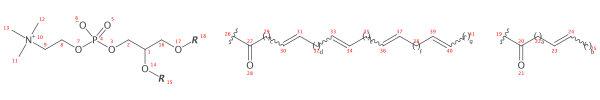

In [31]:
pc_cx_smi = gen_pc_cxsmiles(
    lipid_class="PC",
    fa1_link='a',fa1_c=16,fa1_db=1,
    fa2_link='a',fa2_c=20,fa2_db=4
)
cxsmi_to_svg(pc_cx_smi, with_atom_numbers=True)

User CXSMILES: C(COP(=O)(O)OCCN)(O[R])CO[R].*C(=O)CC=CC.*C(=O)CC=CCC=CC |$;;;;;;;;;;;;;;;_AP1;;;;;;;_AP1;;;;;;;;;;$Sg:n:18:a:ht,Sg:n:21:b:ht,Sg:n:25:c:ht,Sg:n:28:d:ht,Sg:n:31:e:ht |a+b=15,c+d+e=13
Remarks: a+b=15,c+d+e=13


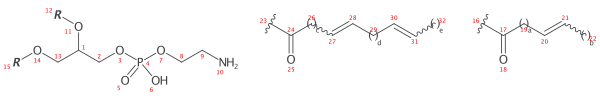

In [32]:
pe_cx_smi = gen_pc_cxsmiles(
    lipid_class="PE",
    fa1_link='a',fa1_c=18,fa1_db=1,
    fa2_link='a',fa2_c=18,fa2_db=2
)
cxsmi_to_svg(pe_cx_smi, with_atom_numbers=True)

User CXSMILES: C(COP(=O)(O)OCC(N)C(O)=O)(O[R])CO[R].*C(=O)C.*C(=O)CC=CC |$;;;;;;;;;;;;;;;;;;_AP1;;;;_AP1;;;;;;;$Sg:n:21:a:ht,Sg:n:25:b:ht,Sg:n:28:c:ht |a=15,b+c=15
Remarks: a=15,b+c=15


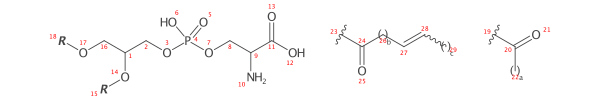

In [33]:
ps_cx_smi = gen_pc_cxsmiles(
    lipid_class="PS",
    fa1_link='a',fa1_c=16,fa1_db=0,
    fa2_link='a',fa2_c=18,fa2_db=1
)
cxsmi_to_svg(ps_cx_smi, with_atom_numbers=True)

User CXSMILES: C(COP(=O)(O)OCC(O)C(O))(O[R])CO[R].*C(=O)CC=CC.*C(=O)CC=CCC=CCC=CC |$;;;;;;;;;;;;;;;;;_AP1;;;;;;;_AP1;;;;;;;;;;;;;$Sg:n:20:a:ht,Sg:n:23:b:ht,Sg:n:27:c:ht,Sg:n:30:d:ht,Sg:n:33:e:ht,Sg:n:36:f:ht |a+b=13,c+d+e+f=11
Remarks: a+b=13,c+d+e+f=11


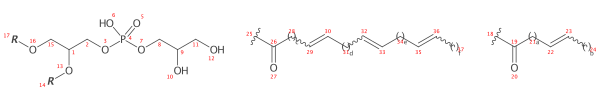

In [34]:
pg_cx_smi = gen_pc_cxsmiles(
    lipid_class="PG",
    fa1_link='a',fa1_c=16,fa1_db=1,
    fa2_link='a',fa2_c=18,fa2_db=3
)
cxsmi_to_svg(pg_cx_smi, with_atom_numbers=True)

User CXSMILES: C(COP(=O)(O)O)(O[R])CO[R].*C(=O)C.*C(=O)CC=CCC=CC |$;;;;;;;;;;;;_AP1;;;;_AP1;;;;;;;;;;$Sg:n:15:a:ht,Sg:n:19:b:ht,Sg:n:22:c:ht,Sg:n:25:d:ht |a=15,b+c+d=13
Remarks: a=15,b+c+d=13


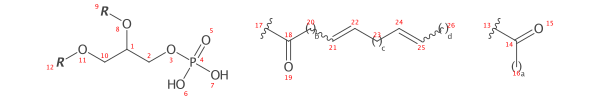

In [35]:
pa_cx_smi = gen_pc_cxsmiles(
    lipid_class="PA",
    fa1_link='a',fa1_c=16,fa1_db=0,
    fa2_link='a',fa2_c=18,fa2_db=2
)
cxsmi_to_svg(pa_cx_smi, with_atom_numbers=True)